In [1]:
import pyshark
import matplotlib.pyplot as plt
import numpy as np
import nest_asyncio
nest_asyncio.apply()
'''
Plot a timeline of the network downlink and uplink traffic in terms of packets 
per second and Kilobytes per second. The timeline can be of 60-seconds 
plotted in the granularity of 100 milliseconds. For both packets/sec or 
KBs/sec - plot two graphs, one for uplink the other one for downlink. Each 
graph should have five subgraphs (line plots) for the five video resolutions. 
(Your code will be tested with a pcap on our side) [10]
'''



'\nPlot a timeline of the network downlink and uplink traffic in terms of packets \nper second and Kilobytes per second. The timeline can be of 60-seconds \nplotted in the granularity of 100 milliseconds. For both packets/sec or \nKBs/sec - plot two graphs, one for uplink the other one for downlink. Each \ngraph should have five subgraphs (line plots) for the five video resolutions. \n(Your code will be tested with a pcap on our side) [10]\n'

In [9]:
# Replace 'your_file.pcap' with the path to your pcap file
pcap_file = ['youtube_480p.pcap','youtube_720p.pcap','youtube_1080p.pcap','youtube_2k.pcap','youtube_4k.pcap']
b=[0]*5

0
10.22.23.233
done
1
10.22.23.233
done
2
10.22.23.233
done
3
10.22.23.233
done
4
10.22.23.233
done


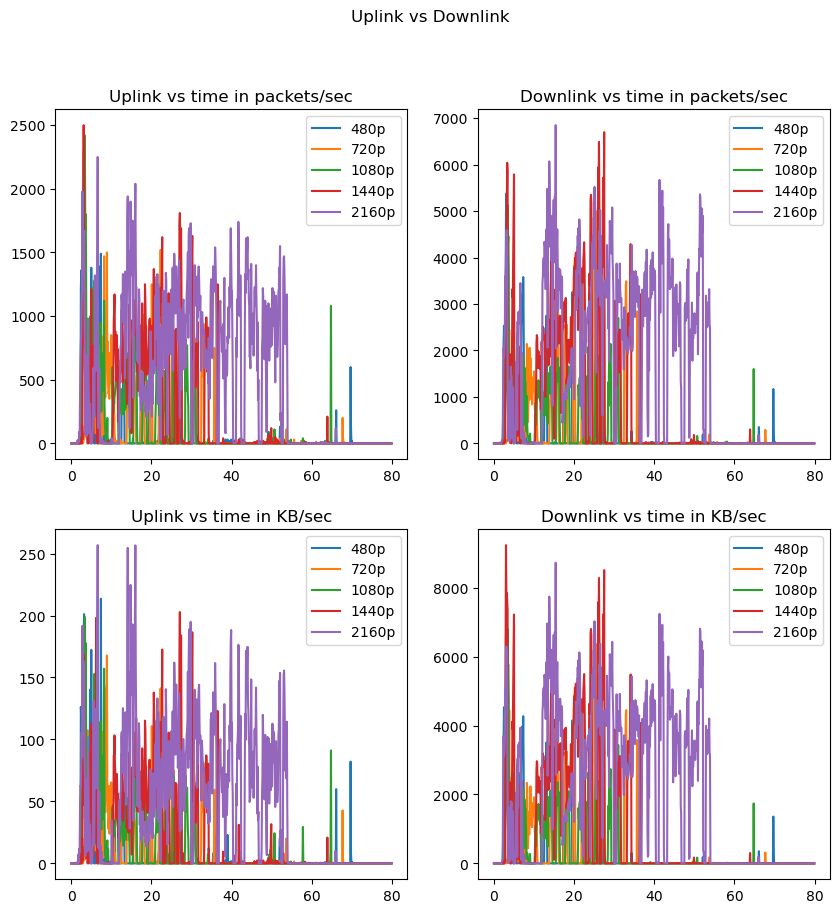

In [11]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))
fig.suptitle('Uplink vs Downlink')
axs[0, 0].set_title('Uplink vs time in packets/sec')
axs[0, 1].set_title('Downlink vs time in packets/sec')
axs[1, 0].set_title('Uplink vs time in KB/sec')
axs[1, 1].set_title('Downlink vs time in KB/sec')
for i in range(5):
        cap = pyshark.FileCapture(pcap_file[i])
        uplink=[0]*800
        downlink=[0]*800
        upkb=[0]*800
        downkb=[0]*800
        print(i)
        t=float(cap[0].sniff_timestamp)
        # Iterate through each packet and filter packets
        your_ip=''
        for packet in cap :
            if 'DNS' in packet and 'IP' in packet:
                if packet.DNS.qry_name == 'www.youtube.com' :
                    your_ip=packet.ip.src
                    #print(your_ip)
                    break

        for packet in cap :
            if 'IP' in packet:
                if packet.ip.src == your_ip:
                    uplink[int((float(packet.sniff_timestamp)-t)*10)]+=10
                    upkb[int((float(packet.sniff_timestamp)-t)*10)]+=float(packet.ip.len)/100 #(packet length is in bytes so divide by 1000 to get KB/sec and then multiply by 10 to get the granularity)
                elif packet.ip.dst == your_ip:
                    downlink[int((float(packet.sniff_timestamp)-t)*10)]+=10
                    downkb[int((float(packet.sniff_timestamp)-t)*10)]+=float(packet.ip.len)/100
        # Convert the data to numpy arrays and plot the data
        for j in range(600):
            if uplink[j]>100 :
                b[i]+=1
        uplink=np.array(uplink)
        downlink=np.array(downlink)
        upkb=np.array(upkb)
        downkb=np.array(downkb)
        time=np.arange(0,80,0.1)
        axs[0, 0].plot(time, uplink)
        axs[0, 1].plot(time, downlink)
        axs[1, 0].plot(time, upkb)
        axs[1, 1].plot(time, downkb)
        #label colors for the 5 resolutions
        print('done')

axs[0, 0].legend(['480p','720p','1080p','2K','4K'])
axs[0, 1].legend(['480p','720p','1080p','2K','4K'])
axs[1, 0].legend(['480p','720p','1080p','2K','4K'])
axs[1, 1].legend(['480p','720p','1080p','2K','4K'])
plt.show()

In [5]:
for i in range(5):
    b[i]=float(b[i])/600
print("Burst slots for 480p,720p,1080p,2K,4K are")
print(b)

Burst slots for 480p,720p,1080p,1440p,2160p are
[0.10333333333333333, 0.23833333333333334, 0.26, 0.3516666666666667, 0.6866666666666666]


In [1]:
########################################################################################

In [3]:
import pyshark
import numpy as np
import matplotlib.pyplot as plt
import nest_asyncio
nest_asyncio.apply()

In [4]:


'''Load the following webpages in your browser and capture the traffic exactly for 
10 seconds (explore -G option in tcpdump for timing). [5] 
• https://www.deccanherald.com/ deccan.pcap - done
• https://www.jagran.com/ jagran.pcap - done 
• https://www.mit.edu/ mit.pcap - done
• https://www.usach.cl/  usach.pcap - fine
• https://www.sinu.edu.sb/  sinu.pcap - fine'''

'''Report the total time required for the DNS query to complete, for all five 
websites. Any insights that you can draw from the numbers? [5] 
 
2. Report the Time-To-First-Byte (TTFB) for all five websites. This includes the 
elapsed period from the time when the DNS query is made and the time when 
first application data (after ‘server hello’) arrives. [5] 
 
3. For a given website, assume a total of N Kilobytes transferred as a part of the 
downlink traffic in the 10 seconds of your trace. Discretize the timeline into 
100 ms slots as before. For each slot, plot the cumulative percentage of data 
that has been transferred till that slot. [5]'''
# take the flag and if first bit is 0 then its a query and if its 1 then its a response
# use src and dst to get query and response
# if its a response then dns.flags_rcode==3 then its a name error
# if its a response then dns.flags_rcode==0 then its a success
# if its a response then dns.flags_rcode==2 then its a server failure
# if its a response then dns.flags_rcode==1 then its a format error

'Report the total time required for the DNS query to complete, for all five \nwebsites. Any insights that you can draw from the numbers? [5] \n \n2. Report the Time-To-First-Byte (TTFB) for all five websites. This includes the \nelapsed period from the time when the DNS query is made and the time when \nfirst application data (after ‘server hello’) arrives. [5] \n \n3. For a given website, assume a total of N Kilobytes transferred as a part of the \ndownlink traffic in the 10 seconds of your trace. Discretize the timeline into \n100 ms slots as before. For each slot, plot the cumulative percentage of data \nthat has been transferred till that slot. [5]'

FileNotFoundError: [Errno 2] No such file or directory: deccan.pcap

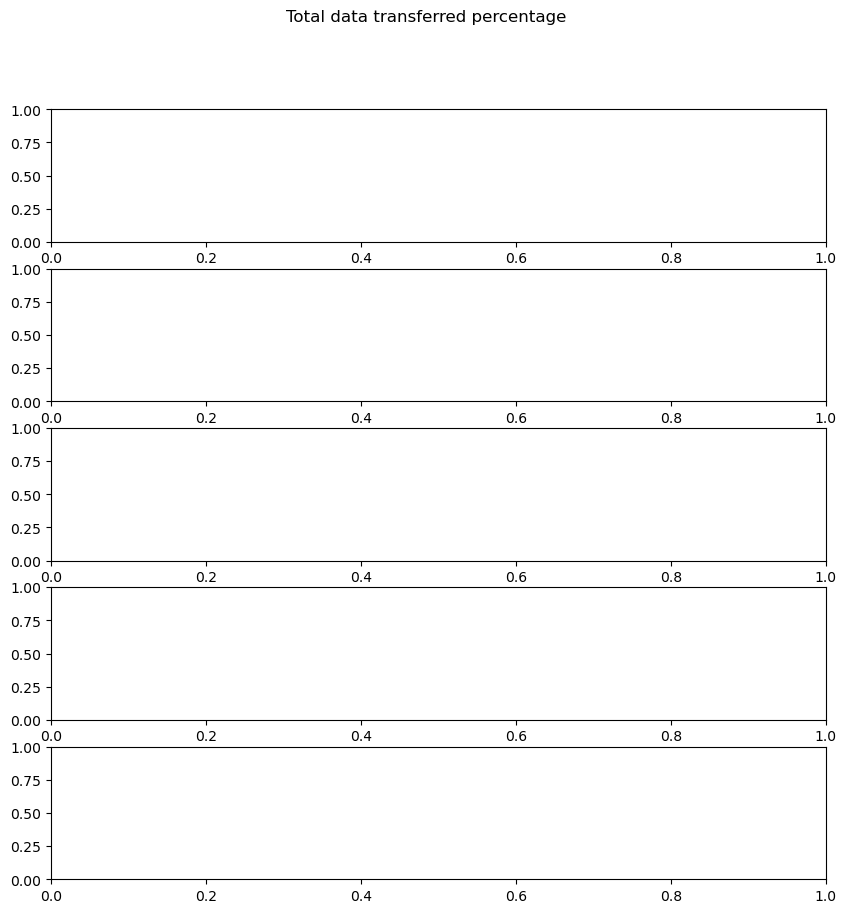

In [5]:
fig, axs = plt.subplots(5,figsize=(10,10))
fig.suptitle('Total data transferred percentage')
pcap_file = ['deccan.pcap','jagran.pcap','mit.pcap','usach.pcap','sinu.pcap']
for i in pcap_file:
    cap = pyshark.FileCapture(i)
    p=0
    t1=0
    t2=0
    ad=''
    ts=float(cap[0].sniff_timestamp)
    for packet in cap:
        if 'DNS' in packet and p==0:
            t1=float(packet.sniff_timestamp)
            #print(t1-ts)
            p+=1
        elif 'DNS' in packet and p==1:
            #find the first valid resolution
            if 'a' in packet.dns.field_names :
                t2=float(packet.sniff_timestamp)
                ad=packet.dns.a
                print(ad,'is the ip address of the website')
                print(t2-t1,"DNS query time taken")
                break
             
    p=0
    #find the time to first byte
    for packet in cap:
        if 'TCP' in packet and 'TLS' in packet and 'IP' in packet:
            if 'handshake' in packet.tls.field_names and p==0:
                #print(packet.ip.src)
                if packet.tls.handshake_type == '2' :
                    #print(float(packet.sniff_timestamp)-t2,"Time to server hello")
                    p+=1
            elif p==1:
                if(packet.ip.src==ad):
                    print(float(packet.sniff_timestamp)-t2,"Time taken to first byte by",i)
                    break
    
    #find the total data transferred
    data=[0]*100
    for packet in cap:
        if(float(packet.sniff_timestamp)-t1>10):
            break
        if 'TCP' in packet and 'TLS' in packet and 'IP' in packet:
            if packet.ip.src==ad:
                data[int((float(packet.sniff_timestamp)-t1)*10)]+=float(packet.ip.len)
    
    for j in range(1,100):
        data[j]+=data[j-1]
    data=[float(i)/data[99] for i in data]
    time=np.arange(0,10,0.1)
    data=np.array(data)
    #plot the data
    axs[pcap_file.index(i)].plot(time, data)
    # name the plots
    axs[pcap_file.index(i)].set_title(i)
    # set y axis label
    axs[pcap_file.index(i)].set_ylabel('Ratio')
    # set x axis label
    axs[pcap_file.index(i)].set_xlabel('Time in seconds')
    #print('done')
plt.show()

In [6]:
''' Insights on the DNS Query Data

    0.0051081180572509766 DNS query time taken by deccan.pcap
    0.058695077896118164 DNS query time taken by jagran.pcap
    0.28450489044189453 DNS query time taken by mit.pcap
    1.0969679355621338 DNS query time taken by usach.pcap
    1.109483003616333 DNS query time taken by sinu.pcap
  1) As we see that the server is sequentially at a higher distance from client and also more infrequent to access from the client topology
    thus the DNS Query time is sequentially blasting up 
  2) Same goes for the TTFB'''

' Insights on the DNS Query Data\n\n    0.0051081180572509766 DNS query time taken by deccan.pcap\n    0.058695077896118164 DNS query time taken by jagran.pcap\n    0.28450489044189453 DNS query time taken by mit.pcap\n    1.0969679355621338 DNS query time taken by usach.pcap\n    1.109483003616333 DNS query time taken by sinu.pcap\n  1) As we see that the server is sequentially at a higher distance from client and also more infrequent to access from the client topology\n    thus the DNS Query time is sequentially blasting up \n  2) Same goes for the TTFB'